### Student Details

Student Name: **Siddharth Prince**

Student ID: **23052058**

# Task 2: Probability Theory

## Example 1 (Discrete Random Variable): Will I need a raincoat today?

Being an international student in Ireland, I've heard people say, "enjoy the sun while you can" a lot. I know that this example is also really over-used in the probability space, but I'm going with it because it is fitting (future pun intended) to the conversations here in Ireland.  

### Goal:  
The aim here is to simulate the weather conditions for a year and to then calculate the probability that you'd need a raincoat for a given day based on the given probability distribution for the past data.  


## Approach

The discrete weather conditions that will be considered for this experiment are as follows:  
- Clear - raincoat? No
- Cloudy - raincoat? Yes (just to be safe)
- Rain - raincoat? Yes!
- Meatballs?! - raincoat? Yes, and an inverted umbrella to catch some? (Hey, one of the mandatory videos on Bayes Theorem ended with the speaker reading quotes about considering the impossible/crazy. So, don't blame me. :) )
  
Remember that we're performing this experiment with the context of observing the weather patterns in Ireland, specifically Limerick. Hence, it should be fair to assume some prior information/bake in some bias in terms of the simulated random data. The data generated with pre-set probabilities should more-or-less conform to those probability values I've set.

### Trying to simulate the weather of Limerick...

<p>Doing a quick search about what the weather in Limerick is usually like, we can see that it is usually quite gloomy and rainy (no kidding) with an <a href="https://weather-and-climate.com/average-monthly-Rainy-days,limerick,Ireland">average of <b>216</b> rainy days annually</a>. So, about <b>59%</b> of the time we'd need a raincoat on average.  </p>
<p>Via the same website, it is reported that the <a href="https://weather-and-climate.com/average-monthly-hours-Sunshine,limerick,Ireland">average annual sunshine in Limerick is 1,307 hours</a> which is about 14.45 days (for simplicity's sake). This roughy equates to <b>15%</b> of the time in a year (I'm beginning to understand why everyone would tell us to enjoy the sun while we could during orientation week).  </p>
<p>This leaves us with <b>26%</b> of the time in a year that have little to no sunshine a.k.a cloudy days.  
Oh and I'm putting the meatball situation to a <b>1 in a million</b> chance because I'm not actually crazy. Who knows, a meat processing factory could have an explosive accident resulting in a tiny geographical part of town receiving a meatball shower...? I digress, moving on with the code.</p>  

In [6]:
# Your code

# Simulating the weather without any preset probabilities
import numpy as np

# Defining the possible weather conditions
weatherConditions = ['clear', 'cloudy', 'rain', 'meatballs']

# Simulating the weather for a year
days = 365
probabilities = [0.15, 0.259999, 0.59, 0.000001]
simWeatherData = np.random.choice(weatherConditions, days, p=probabilities) # preconditions for any set expected probabilities

# Determine if you need a raincoat for each day based on conditions
needRaincoatList = [1 if weather != 'clear' else 0 for weather in simWeatherData] # List of results for our discrete random variable

# Generated data
# print(f'Simulated weather data:\n{simWeatherData}')
# print(f"Days I'd need a raincoat:\n{needRaincoatList}")

Now that the data has been generated, we can derive some stats on the data.

In [7]:
daysINeedARaincoat = sum(needRaincoatList)
needRaincoatProbability = daysINeedARaincoat/days
print(f"Total days in a year that I'd need a raincoat: {daysINeedARaincoat}")
print(f"Percentage of the time in a year that I'd need a raincoat (probability): {needRaincoatProbability*100:.2f}%")

unique, counts = np.unique(simWeatherData, return_counts=True)
if 'meatballs' not in unique:
    unique = np.append(unique, 'meatballs')
    counts = np.append(counts, 0.0)
distDict = dict(zip(unique, counts))
print(f'Data distribution: {distDict}')

Total days in a year that I'd need a raincoat: 307
Percentage of the time in a year that I'd need a raincoat (probability): 84.11%
Data distribution: {'clear': 58.0, 'cloudy': 96.0, 'rain': 211.0, 'meatballs': 0.0}


In [4]:
# Probability distribution:
from IPython.display import Markdown as md

md(f'### Probability distribution:  <table><tr><td><b>Weather Conditions</b></td><td>Clear</td><td>Cloudy</td><td>Rain</td><td>Meatballs</td></tr><tr><td><b>Probability</b></td><td>{round(distDict["clear"]/days, 2)}</td><td>{round(distDict["cloudy"]/days, 2)}</td><td>{round(distDict["rain"]/days, 2)}</td><td>{round(distDict["meatballs"]/days, 2)}</td></tr></table>')

### Probability distribution:  <table><tr><td><b>Weather Conditions</b></td><td>Clear</td><td>Cloudy</td><td>Rain</td><td>Meatballs</td></tr><tr><td><b>Probability</b></td><td>0.13</td><td>0.27</td><td>0.6</td><td>0.0</td></tr></table>

#### Plotting the data

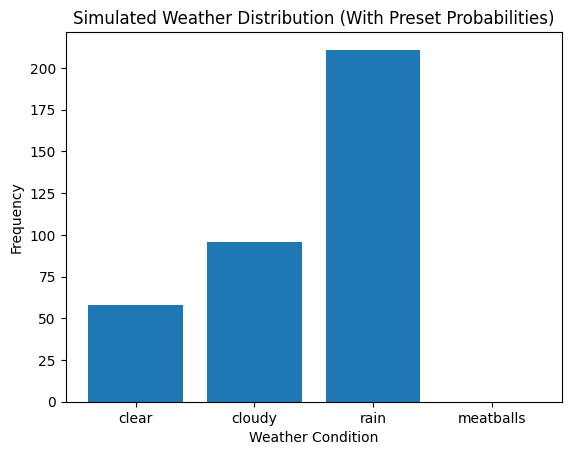

In [8]:
import matplotlib.pyplot as plt

plt.bar(unique, counts)
plt.xlabel('Weather Condition')
plt.ylabel('Frequency')
plt.title('Simulated Weather Distribution (With Preset Probabilities)')
plt.show()

```
Numbers according to the simulated data above:
+--------+--------+--------+-----------+
| Clear  | Cloudy |  Rain  | Meatballs |
+--------+--------+--------+-----------+
|   58   |   96   |   211  |     0     |
+--------+--------+--------+-----------+
Total no. of days on which a raincoat would be required = 307 (this would be the mean)
```

### Plotting a binomial distribution

The number of trials here is 365 days as mentioned before. As per the simulated data, we'd need a raincoat on 307/356 days which is a probability of 0.84. But for the binomial distribution, we're going to go with the probability based on the reported data. This can be calculated as follows:
```
1. Reported % of rainy days in a year = 59% => 0.59 probability.
2. Reported % of cloudy days in a year = 100% - (% of rainy days _4 + % of sunny days + % of meatball days)
                                       = 1 - (0.59 + 0.15 + 0) => 0.26 probability.
3. There are obviously going to be no days in a year with raining meatballs. Hence its probability is 0.
```
Thus total probability that one will need an umbrella from reported data = 0.59 + 0.26 = **0.85**  
We can already see that this probability is almost the same as that we gotten from our simulations. Just a difference of 0.01.

mean: 307.0
std deviation: 6.984523007610156


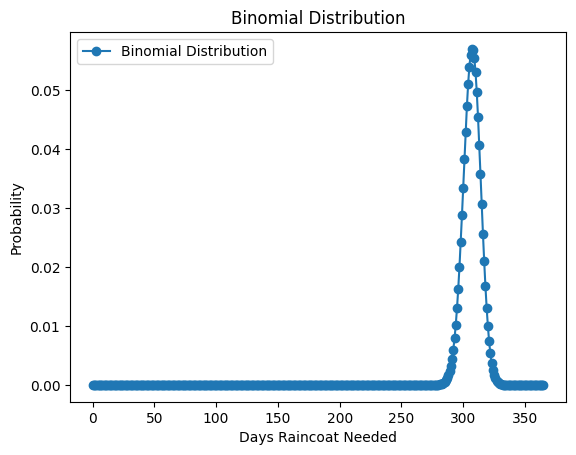

In [18]:
from scipy.stats import binom

# Parameters for the binomial distribution


mu = days * needRaincoatProbability
sigma = np.sqrt(days * needRaincoatProbability * (1 - needRaincoatProbability))
print(f'mean: {mu}') # mean value
print(f'std deviation: {sigma}') # standard deviation

# Overlay the binomial distribution
x = np.arange(0, days+1)
plt.plot(x, binom.pmf(x, days, needRaincoatProbability), 'o-', label='Binomial Distribution')

plt.xlabel('Days Raincoat Needed')
plt.ylabel('Probability')
plt.title('Binomial Distribution')
plt.legend()
plt.show()

### Conclusion:

The probability distribution of the simulated data closely resembles the results calculated with the reported values and corresponds to the binomial distribution obtained. According to the simulation, I'd need a raincoat for **307 days in a year (84.1% probability)** which is a good approximation to the actual data of 310 days calculated above. The binomial distribution shows the chance for the standard deviation of about 7 days that can occur (judging approximatedly from the graph and from the calculated sigma value). 

##### Also, all is right with the world as there were no cloudy days with a chance of meatballs in the simulated data. :)

## Example 2 (Continuous Random Variable): Doubling down on the rain theme

As the title of this section suggests, we're going to synthesise data of daily rainfall in mm. Since the value can vary between a rannge, this is a continuous random variable problem.

### Goal:
The aim is to assume a reasonable mean daily rainfall value based on real reported data in Limerick and simulate data for 365 days based on a normal probability distribution. 

## Approach

From the same source we'd refered to for the discrete problem, we can see that the average annual precipitation (usually just rainfall here) is 1099mm. Taking the average of that over 365 days gives us about 3mm of rain a day which is the mean. Now we know that it doesn't rain every single day over the course of the year though we get a lot of rain here. So, any value seen less than or equal to zero in the below distribution graphs can be taken as no rainfall. We'll start with a mean value higher than what we computed from the reported data to see how off we are from the mark and work our way from there.

Total simulated rainfall in mm: 3658.57591077991
Mean of rainfall in mm: 10.023495645972355


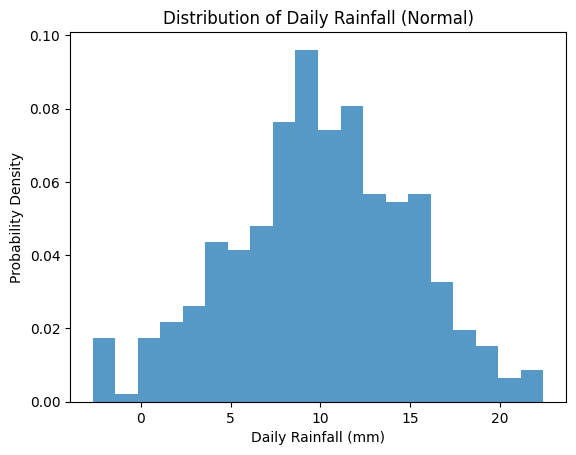

In [82]:
# Your code

# Parameters for the normal distribution
from scipy.stats import gamma

# Parameters for the gamma distribution (adjust as needed)
mu = 10  # Mean daily rainfall 
sigma = 5  # Standard deviation of daily rainfall. This is just an assumption.

# Simulate daily rainfall for 100 days
numDays = 365
simulatedRainfall = np.random.normal(mu, sigma, numDays)
# simulated_rainfall
print(f'Total simulated rainfall in mm: {sum(simulatedRainfall)}')
mean = sum(simulatedRainfall)/numDays
print(f'Mean of rainfall in mm: {mean}')

def plotDist(simulatedRainfall, distType):
    plt.hist(simulatedRainfall, bins=20, density=True, alpha=0.75)
    plt.xlabel('Daily Rainfall (mm)')
    plt.ylabel('Probability Density')
    plt.title(f'Distribution of Daily Rainfall ({distType})')
    plt.show()

plotDist(simulatedRainfall, 'Normal')

Rainfall simulated is more than triple the actual average. So, let's tweak the parameters and try again.

Total simulated rainfall in mm: 2024.4643946172541
Mean of rainfall in mm: 5.546477793471929


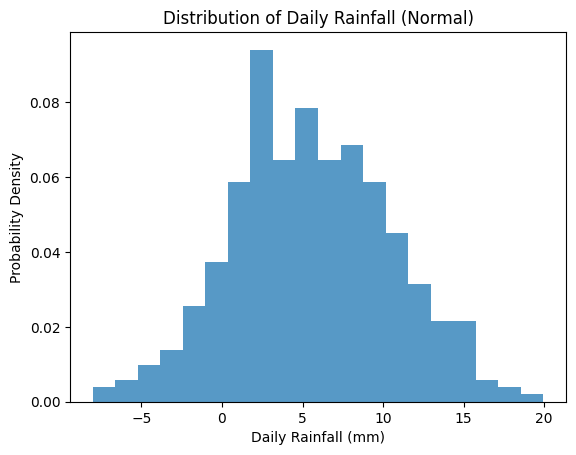

In [83]:
mu = 5 # Halving the mean this time
sigma = 5 # Keeping this the same and seeing how it goes.

simulatedRainfall = np.random.normal(mu, sigma, numDays)
# simulated_rainfall
print(f'Total simulated rainfall in mm: {sum(simulatedRainfall)}')
mean = sum(simulatedRainfall)/numDays
print(f'Mean of rainfall in mm: {mean}')

plotDist(simulatedRainfall, 'Normal')

This distribution is closer to the actual data but is still slightly higher w.r.t the total rainfall. Let's try again with the reported ground value.

Total simulated rainfall in mm: 1099.107459789486
Mean of rainfall in mm: 3.0112533144917424


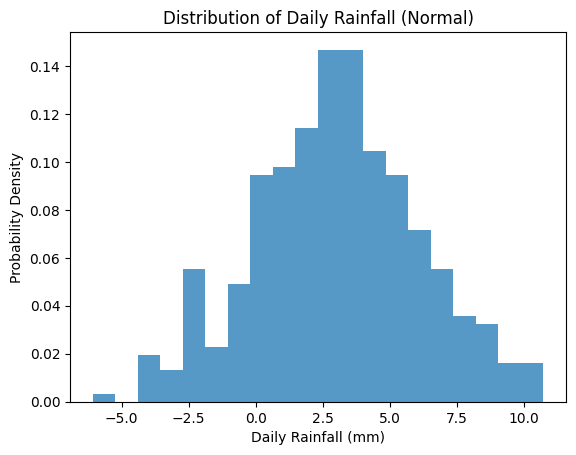

In [89]:
mu = 3 # Changing the mean to our calculated 3mm from the reported data
sigma = 3 # Changing the standard deviation to be slightly more tighter.

simulatedRainfall = np.random.normal(mu, sigma, numDays)
# simulated_rainfall
print(f'Total simulated rainfall in mm: {sum(simulatedRainfall)}')
mean = sum(simulatedRainfall)/numDays
print(f'Mean of rainfall in mm: {mean}')

plotDist(simulatedRainfall, 'Normal')

Third time's the charm! We've gotten a distribution that is exactly the same as our actual average total rainfall of 1,099 mm! We probably should have stuck with the calculated mean of 3mm all along, duh! But, guess there's no fun in that. 

### Observations & conclusion:
- The normal distribution distributes the probabilities towards the mean.
- Lowering the standard deviation lessens the spread because there is lesser deviation from the mean.
- Now, obviously there cannot be negative rainfall and hence this isn't probably the best proabability distribution function to model the behaviour of rainfall.

This lead me to explore other models which brought the Gamma distribution to my attention. So, instead of taking an even distribution like the normal distribution, the gamma distribution can be tweaked to be skewed based on what is realistic using the shape parameter while also being able to control its spread. To be honest, I'm still trying to grasp the math behind this function, but I just wanted to give it a try and the results are below.

Total simulated rainfall in mm: 1099.107459789486
Mean of rainfall in mm: 3.0112533144917424


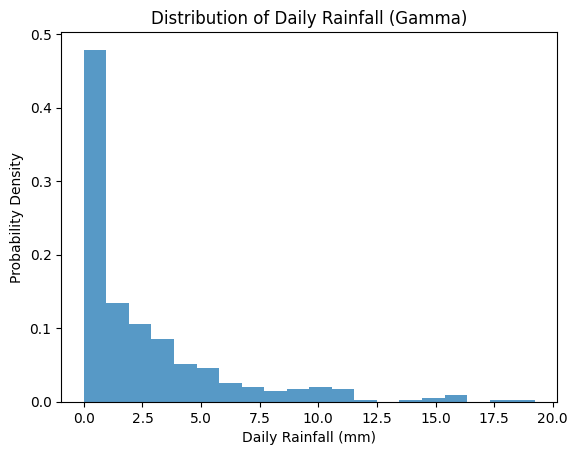

In [90]:
# After playing around for a bit with the below alpha and beta values,
alpha = 0.5 # This is the shape parameter that skews the distribution towards where we'd want our data to be most dense ar.
beta = 6 # The spread factor determines how spread the data can be.

gammaSimulatedRainfall = np.random.gamma(alpha, beta, numDays)
# simulated_rainfall
print(f'Total simulated rainfall in mm: {sum(simulatedRainfall)}')
mean = sum(simulatedRainfall)/numDays
print(f'Mean of rainfall in mm: {mean}')

plotDist(gammaSimulatedRainfall, 'Gamma')

We did it again! We got the exact same annual rainfall number. But, this distribution does not have any negative values and seems to be spread out in a way that might be realistic to real life rainfall patterns. 

# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [3]:
# import dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

# Read the data from the .csv, using the first row as the headers of the data
data = pd.read_csv('./DataSets/01_heights_weights_genders.csv',header=0)

pd.set_option("display.precision", 2)
# Show just the first few samples so we know it's read correctly
data.head(n=3)

Gender  Height  Weight
0   Male   73.85  241.89
1   Male   68.78  162.31
2   Male   74.11  212.74

### EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  10000 non-null  object 
 1   Height  10000 non-null  float64
 2   Weight  10000 non-null  float64
dtypes: float64(2), object(1)
memory usage: 234.5+ KB


In [5]:
data.describe()

Height    Weight
count  10000.00  10000.00
mean      66.37    161.44
std        3.85     32.11
min       54.26     64.70
25%       63.51    135.82
50%       66.32    161.21
75%       69.17    187.17
max       79.00    269.99

In [6]:
data.describe(include=object)

Gender
count   10000
unique      2
top      Male
freq     5000

In [7]:
print(data.loc[data['Gender'] == 'Male', 'Height'].mean())
print(data.loc[data['Gender'] == 'Male', 'Height'].median())
print(data.loc[data['Gender'] == 'Male', 'Weight'].mean())
print(data.loc[data['Gender'] == 'Male', 'Weight'].median())

69.02634590621741
69.02770850939555
187.0206206581932
187.033546088862


In [8]:
print(data.loc[data['Gender'] == 'Female', 'Height'].mean())
print(data.loc[data['Gender'] == 'Female', 'Height'].median())
print(data.loc[data['Gender'] == 'Female', 'Weight'].mean())
print(data.loc[data['Gender'] == 'Female', 'Weight'].median())

63.70877360342507
63.730923859147495
135.86009300746835
136.11758297008498


### Visualise

<Axes: xlabel='Height', ylabel='Weight'>

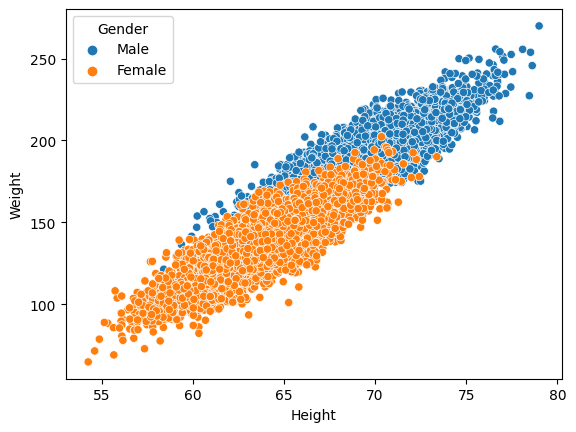

In [9]:
################################
# Your code here

sns.scatterplot(x='Height', y='Weight', hue='Gender',data=data)

###### Discuss: Do you think there is resonable separation?
Though there is an overlap in the middle, there is a fair amount of separation in height and weight metrics among the two genders as is evident from the above scatterplot.

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [10]:
X = data.iloc[:,1:] # X is the features in our dataset
y = data.iloc[:,0]  # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [11]:
################################
# Your code here
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33) # Selecting 1/3 of the data for testing.
# print(X_train)
# print(y_train)

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [12]:
from sklearn.naive_bayes import GaussianNB

################################
# Your code here

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(X_train, y_train) # training the model based on the split training data.

GaussianNB()

### Test the algorithm
Using the test data

In [24]:
from sklearn.metrics import accuracy_score

################################
# Your code here

prediction = model.predict(X_test) # Using the trained model to classify based on the testing data features of height and weight.

# Getting the accuracy score of the model based on the number of correct predictions the model made.
print(f'Accuracy: {accuracy_score(y_test, prediction)*100:.2f}%') 

Accuracy: 88.39%


### Plot the random samples

In [18]:
################################
# Your code here

import random

# Generating synthetic data

dataList = []
for i in range(5000):
    height = round(random.uniform(50, 80), 6)
    weight = round(random.uniform(75, 275), 6)
    gender = ""
    if height >= 69 and weight >= 187:
        gender = "Male"
    elif height <= 64 and weight <= 136:
        gender = "Female"
    else:
        gender = "Male" if round(random.random()) == 1 else "Female"
    row = {"Gender": gender, "Height": height, "Weight": weight}
    dataList.append(row)

df = pd.DataFrame(dataList, columns=list(data.columns))
df.head(10)

Gender  Height  Weight
0    Male   75.78  266.50
1  Female   57.36  162.13
2    Male   67.41  150.82
3  Female   69.80   97.16
4  Female   65.46  259.46
5    Male   76.35  137.25
6  Female   58.60  173.68
7    Male   59.77  220.86
8  Female   55.75   86.86
9    Male   69.65  128.41

In [19]:
df.describe()

Height   Weight
count  5000.00  5000.00
mean     65.04   175.64
std       8.55    57.80
min      50.00    75.03
25%      57.79   125.22
50%      65.03   176.38
75%      72.49   225.89
max      80.00   274.94

In [20]:
print(df.loc[df['Gender'] == 'Male', 'Height'].mean())
print(df.loc[df['Gender'] == 'Male', 'Height'].median())
print(df.loc[df['Gender'] == 'Male', 'Weight'].mean())
print(df.loc[df['Gender'] == 'Male', 'Weight'].median())

67.52131028852202
69.1386285
194.5844233596698
200.578656


In [21]:
print(df.loc[df['Gender'] == 'Female', 'Height'].mean())
print(df.loc[df['Gender'] == 'Female', 'Height'].median())
print(df.loc[df['Gender'] == 'Female', 'Weight'].mean())
print(df.loc[df['Gender'] == 'Female', 'Weight'].median())

62.467965068403906
61.692345
156.00690876587947
143.3551325


#### Observation:
The synthetically generated data has a higher mean and median than in the original data for both genders in terms of features. Will be interesting to see what the accuracy of the trained model will be based on this. 

In [29]:
newPred = model.predict(df.iloc[:,1:])

print(f'Accuracy: {accuracy_score(df.iloc[:,0], newPred)*100:.2f}%')

Accuracy: 65.34%


<Axes: xlabel='Height', ylabel='Weight'>

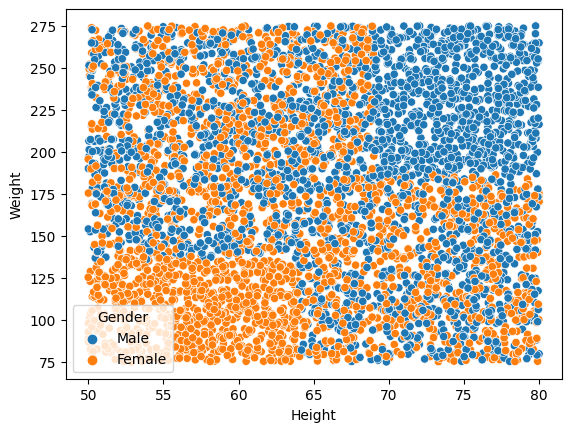

In [31]:
# Plotting the data points
sns.scatterplot(x='Height', y='Weight', hue='Gender',data=df)

#### Conclusions:
- As expected, the model accuracy for the synthetic data is significantly lower but probably not as low as it could have been had the data been generated in a truly random way without any conditions whatsover.
- We can see from the scatterplot that a lot of the data points are all over the place when compared to a more reasonable and clustered pattern from the plot of the original data.
- Naturally, when there are more data points to the point where those that should be called "outliers" can no longer be called that, the pattern will be much harder to discern.

**Additional note:**  
It might be worthwhile to explore augmenting the original data with additional features such as a BMI column calculated from the height and weight. This could help with a better accuracy but we'd have to test it to be sure (at least plot graphs to check for any patterns). 

# Activity 4: Exploration of Reinforcement Learning

<p>Supervised learning is great and it works well in many situations. But the very nature of the supervised learning method itself poses a limitation when it comes to training AI models that can go beyond the efficiency and "understanding" of human beings. This may not be obvious at first, but when you think about it, in supervised learning, we are required to label the data on which a model is then trained to fit that data definied by us. Thus, the machine never learns entirely by itself. Even if you consider unsupervised learning where you'd let the machine cluster data based on what it finds to be distinguishable characterstics, you do need to check and use the classified data and the features by yourself. The machine isn't necessarily learning any task to achieve an end goal. Hence the idea for reinforcement learning as the third tenet of the ML domain was born.</p>

### Understanding RLs on a very basic level:

<p>One can think of reinforement learning (RL) similar to training a pet, say a dog, to do tricks. When you want to teach a dog to sit, you gesture it to sit with your hands and say "sit". This is you defining the end goal. Of course a dog who has never been eposed to this command before will be puzzled and probably give you its adorable puppy eyed stare. But overtime, by chance when you say the command "sit" and say the dog decides to sit, you give it a dog treat. This triggers an understanding in the dog that the action of sitting is what you meant by telling it the command that sounds like "sit". Every time you give it a treat for siting, you're essentially <b>reinforcing</b> the action by incentivising the dog with a reward which is the treat. Thus, the dog eventually learns to sit when you tell it to because it expects a dog treat at the end of the command and it performing the action.</p>

<p>The idea for RL method of machine learning is similar where we define an end goal in a set problem space and just let the model run. For every attempt where it reaches the desired end state, we trigger the reward function which in this case would be increasing a variable, say a reward score by 1 which is a computer's version of a snack. :) For every attempt it fails, we decrease the score by 1 which discourages it from doing the action. Now the difference between a machine and a dog or any intelligent living being is that a computer requires many more attempts to learn a task. Thousand, probably millions more. It does not have any innate knowledge or previous experience to draw from. So, if a human and a computer were to compete for who can learn to play a game faster, it would usually be the human that would win. However, it is worth noting that we as humans have some inbuilt biases on how the world works and if the game is not created to reflect certain expected properties, we would have a hard time while it would be the same for the computer. Though, this is usually a niche scenario because we do live in the physical world where certain things work the way we expect it to which again, we've learnt based on thousands of years of our observations and experiences.</p>

### Exploration and ideas:

<p>It would be interesting to explore the possibilities of embedding some pre-gained knowledge into an RL model before we start the many iterations/epochs of its learning process. This knowledge could be from prior models that learnt some task whose learnings could be relevant to a new task. Maybe having an RL model to work on better optimising the training time of another RL model might give us some insights too.</p>

### Conclusion:

<p>To conclude, RL is a fascinating branch of ML that has given rise to a lot of research with some of the most notable being DeepMind's AlphaGo, advancements in motor function/dexterity simulations in robots and many more. Though this isn't as popularly used in practice in industry, this field of research definitely needs more exploring and is on the cutting edge of ML. </p>